### train と test の差を認識する

In [3]:
import pandas as pd
import numpy as np
import pickle
import gc
from matplotlib import pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}

In [6]:
train_meta_df = pd.read_feather('../features/train/meta_features.ftr')
test_meta_df = pd.read_feather('../features/test/meta_features.ftr')

In [52]:
def compare_cols(train_df, test_df, col):
    fig, axs = plt.subplots(1, 2, figsize=(7, 4))
    axs[0].hist(train_df[col].dropna(), bins=50)
    axs[0].set_title('train')
    axs[1].hist(test_df[col].dropna(), bins=50)
    axs[1].set_title('test')

In [49]:
for col in train_meta_df.columns.tolist():
    if 'w' in col:
        print(col)

mwebv
flux_skew
abs_magnitude_skew
corrected_flux_skew
flux_err_skew
flux_ratio_sq_skew
flux_by_flux_ratio_sq_skew
corrected_flux_ratio_sq_skew
corrected_flux_by_flux_ratio_sq_skew
band-0_std_upper_mjd_skew
band-1_std_upper_mjd_skew
band-2_std_upper_mjd_skew
band-3_std_upper_mjd_skew
band-4_std_upper_mjd_skew
band-5_std_upper_mjd_skew
band-0_detected_mjd_skew
band-1_detected_mjd_skew
band-2_detected_mjd_skew
band-3_detected_mjd_skew
band-4_detected_mjd_skew
band-5_detected_mjd_skew
detected_mjd_skew
std_upper_mjd_skew
std_lower_mjd_get_max_min_diff
std_lower_mjd_var
std_lower_mjd_skew
std_lower_flux_count
std_lower_flux_max
band-0_wmean
band-0_flux_skew
band-0_flux_ratio_sq_skew
band-0_flux_by_flux_ratio_sq_skew
band-1_wmean
band-1_flux_skew
band-1_flux_ratio_sq_skew
band-1_flux_by_flux_ratio_sq_skew
band-2_wmean
band-2_flux_skew
band-2_flux_ratio_sq_skew
band-2_flux_by_flux_ratio_sq_skew
band-3_wmean
band-3_flux_skew
band-3_flux_ratio_sq_skew
band-3_flux_by_flux_ratio_sq_skew
band-4_w

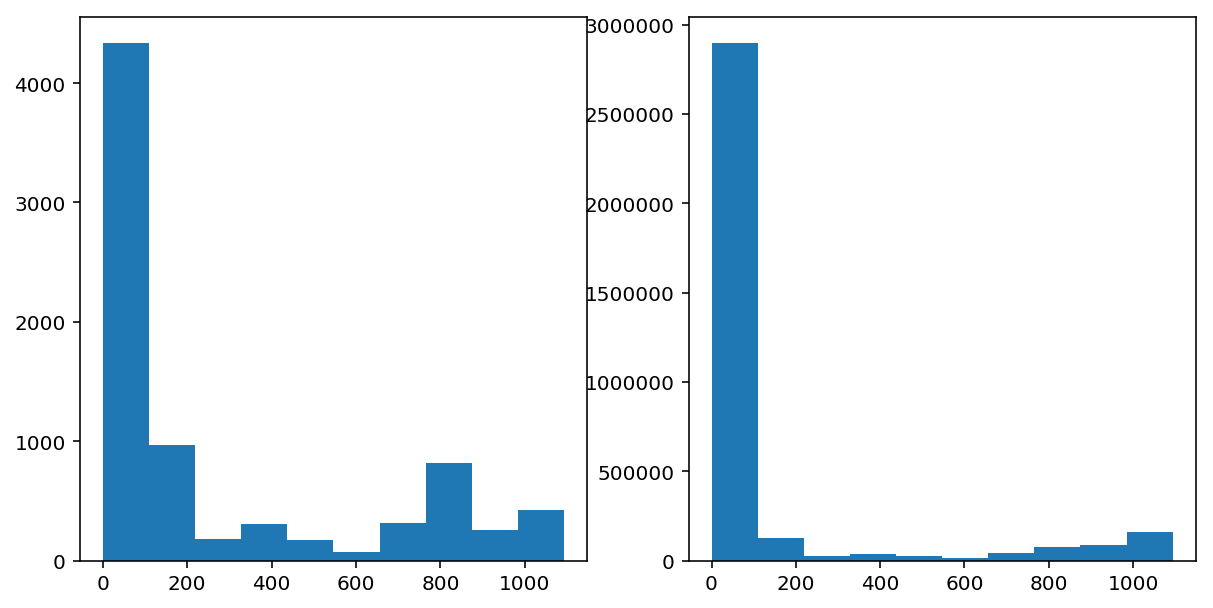

In [25]:
compare_cols(train_meta_df, test_meta_df, 'detected_mjd_get_max_min_diff')

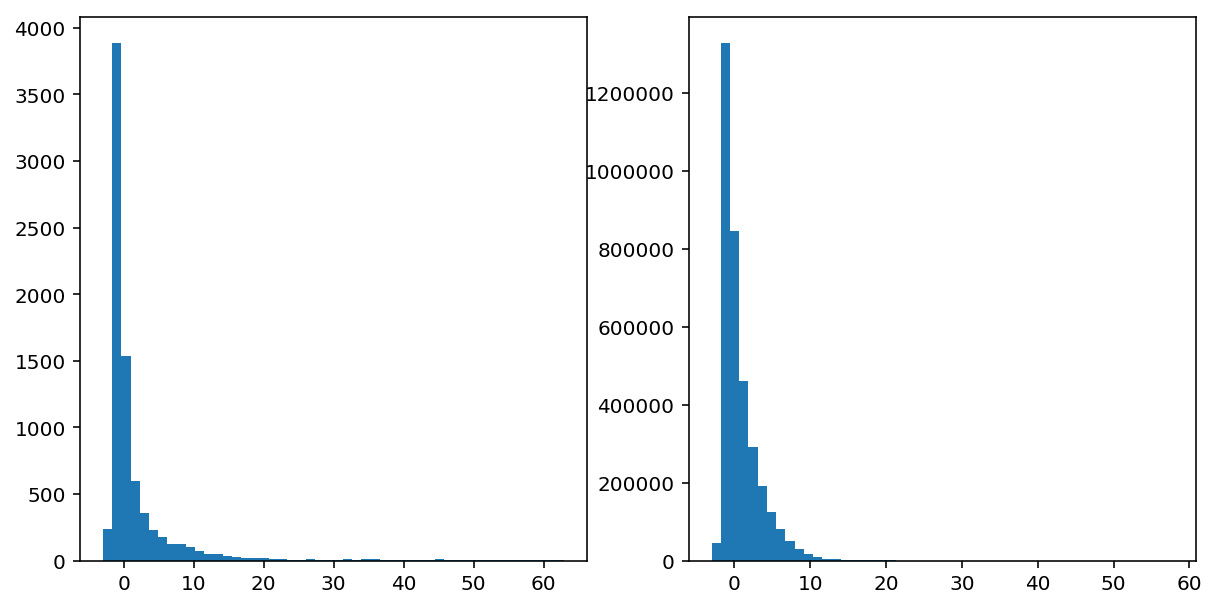

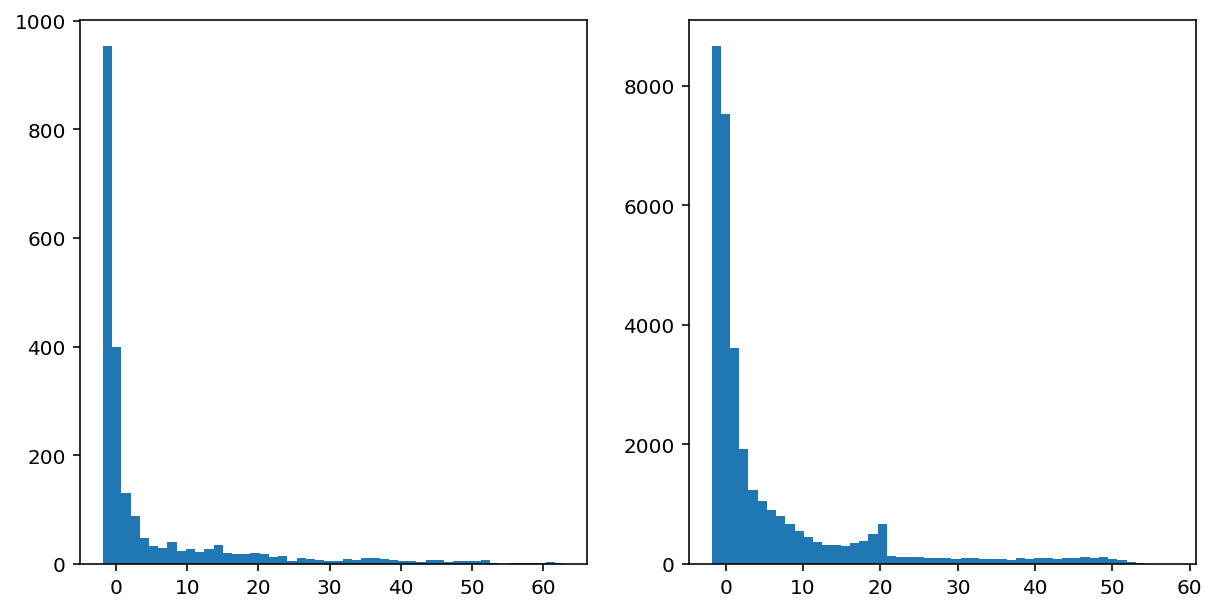

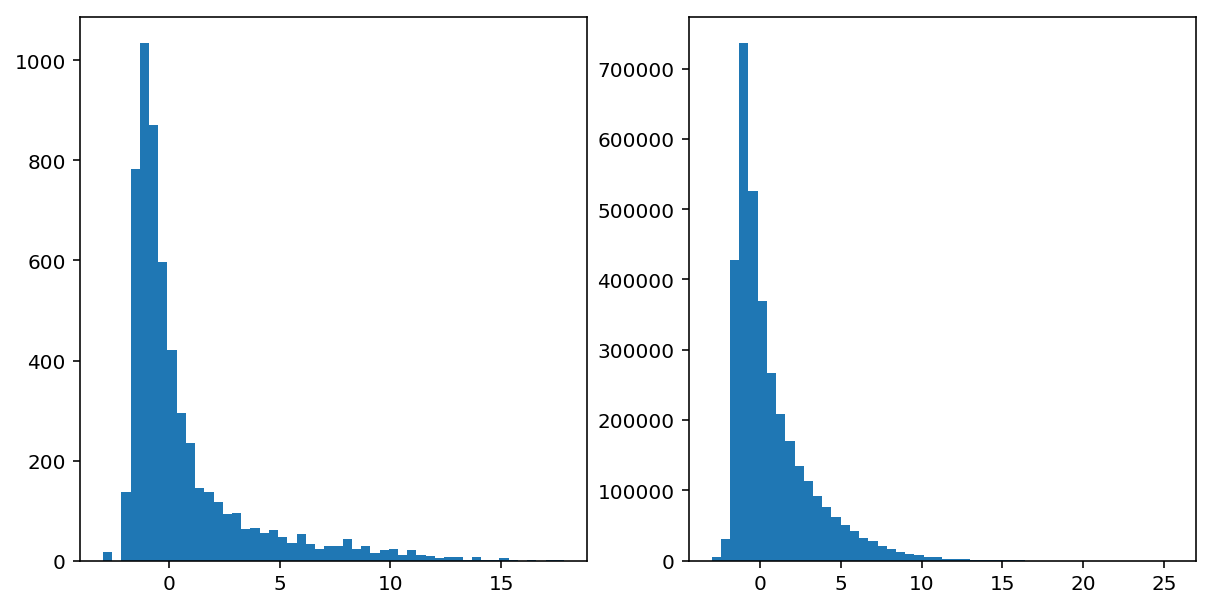

In [35]:
compare_cols(train_meta_df, test_meta_df, 'peak-30-30_flux_kurtosis')
compare_cols(train_meta_df[train_meta_df.ddf==1], test_meta_df[test_meta_df.ddf==1], 'peak-30-30_flux_kurtosis')
compare_cols(train_meta_df[train_meta_df.ddf==0], test_meta_df[test_meta_df.ddf==0], 'peak-30-30_flux_kurtosis')

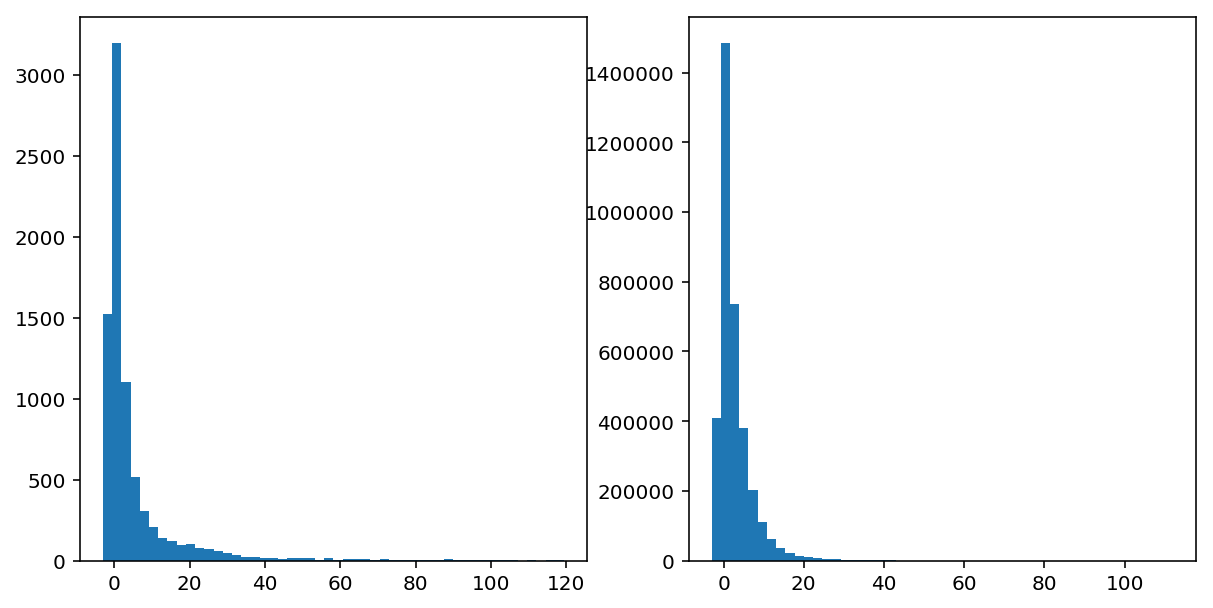

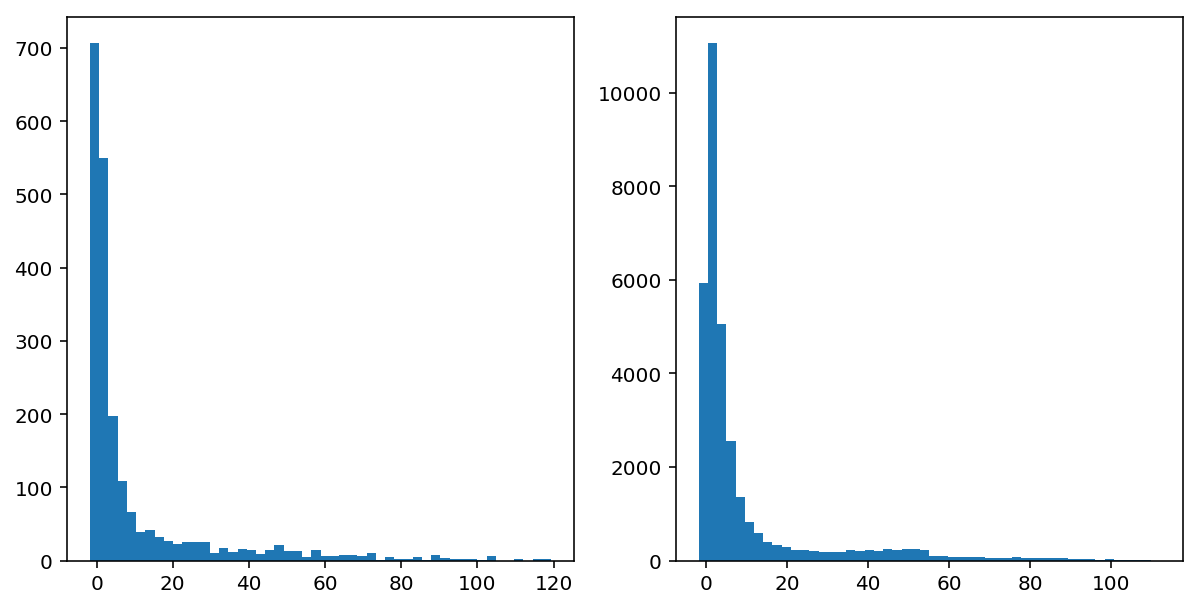

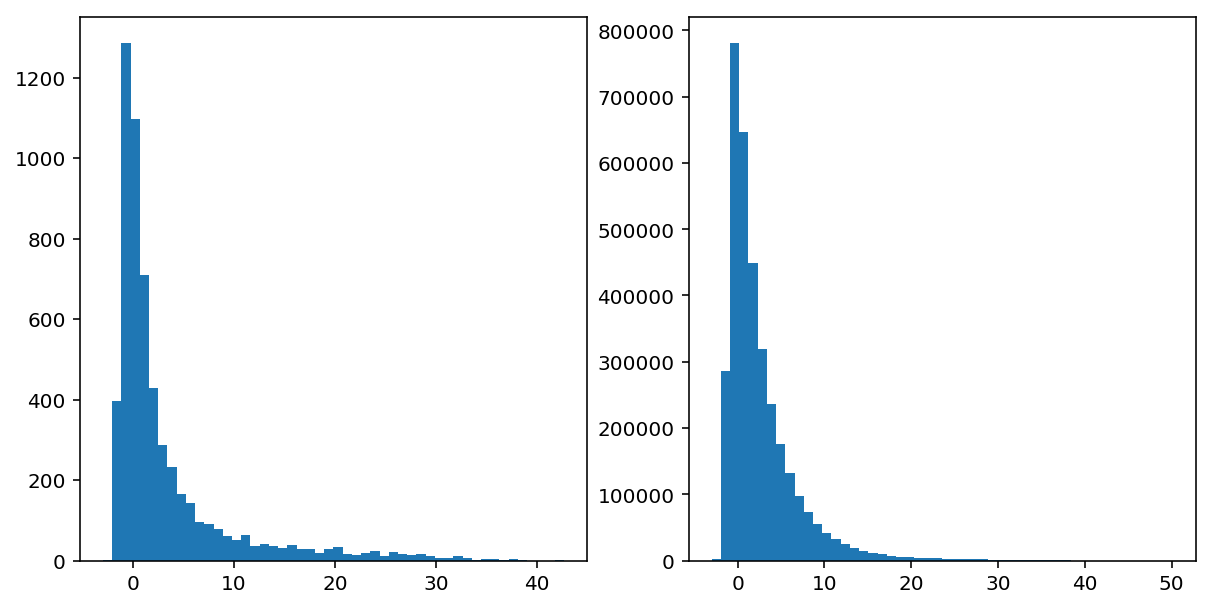

In [36]:
compare_cols(train_meta_df, test_meta_df, 'peak-90-90_flux_kurtosis')
compare_cols(train_meta_df[train_meta_df.ddf==1], test_meta_df[test_meta_df.ddf==1], 'peak-90-90_flux_kurtosis')
compare_cols(train_meta_df[train_meta_df.ddf==0], test_meta_df[test_meta_df.ddf==0], 'peak-90-90_flux_kurtosis')

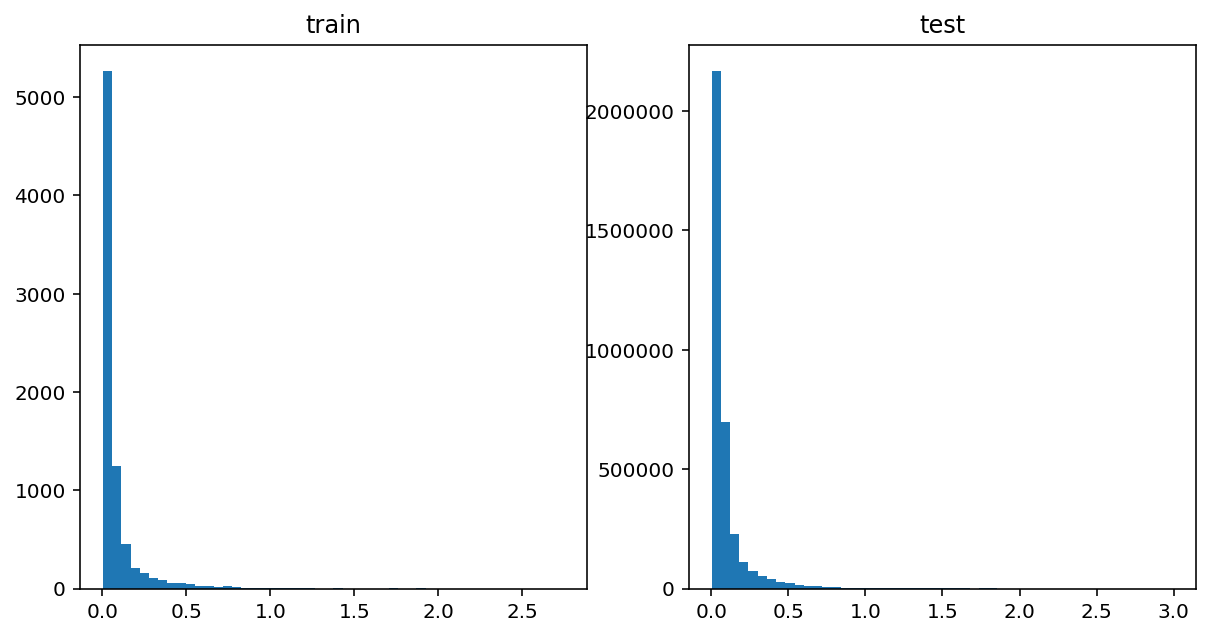

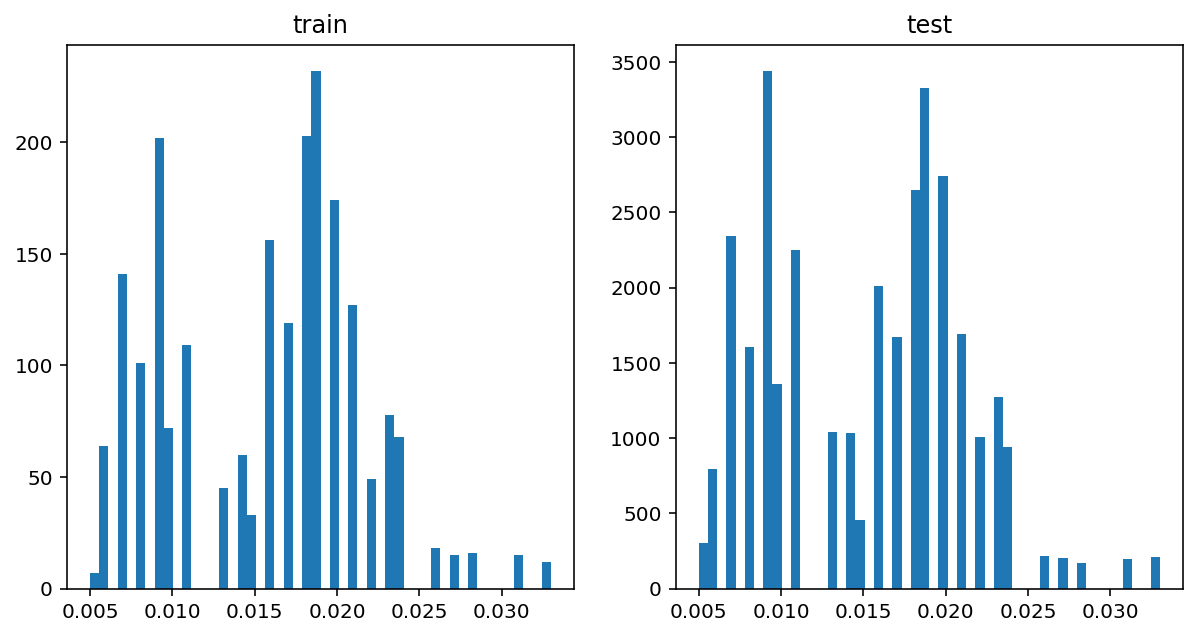

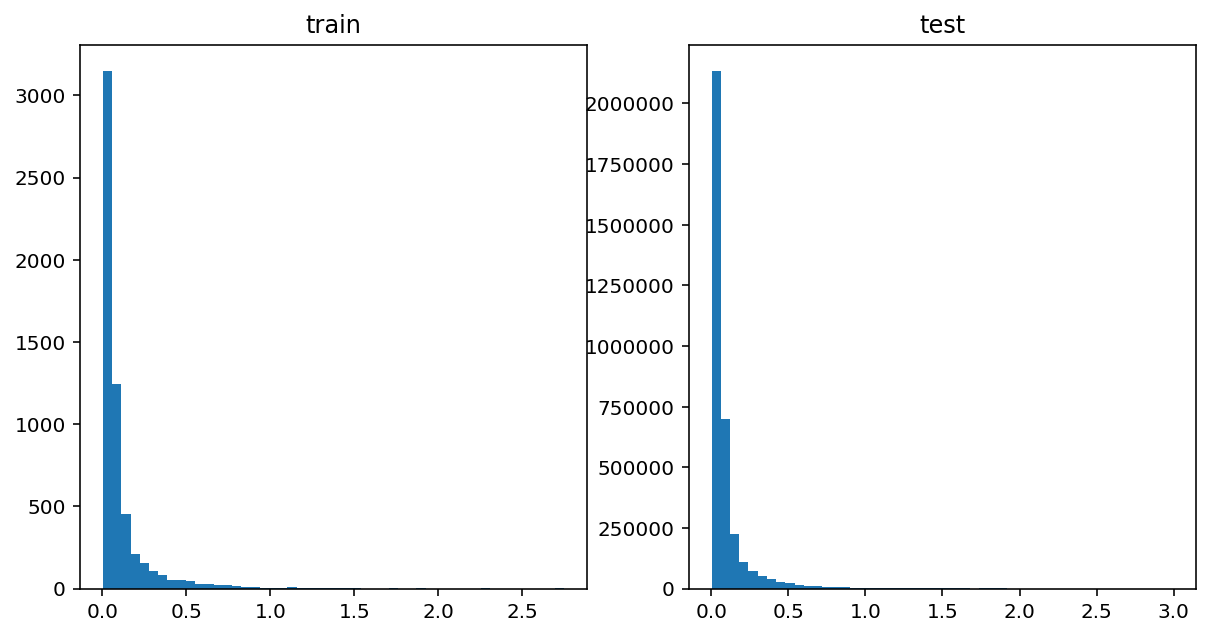

In [50]:
compare_cols(train_meta_df, test_meta_df, 'mwebv')
compare_cols(train_meta_df[train_meta_df.ddf==1], test_meta_df[test_meta_df.ddf==1], 'mwebv')
compare_cols(train_meta_df[train_meta_df.ddf==0], test_meta_df[test_meta_df.ddf==0], 'mwebv')

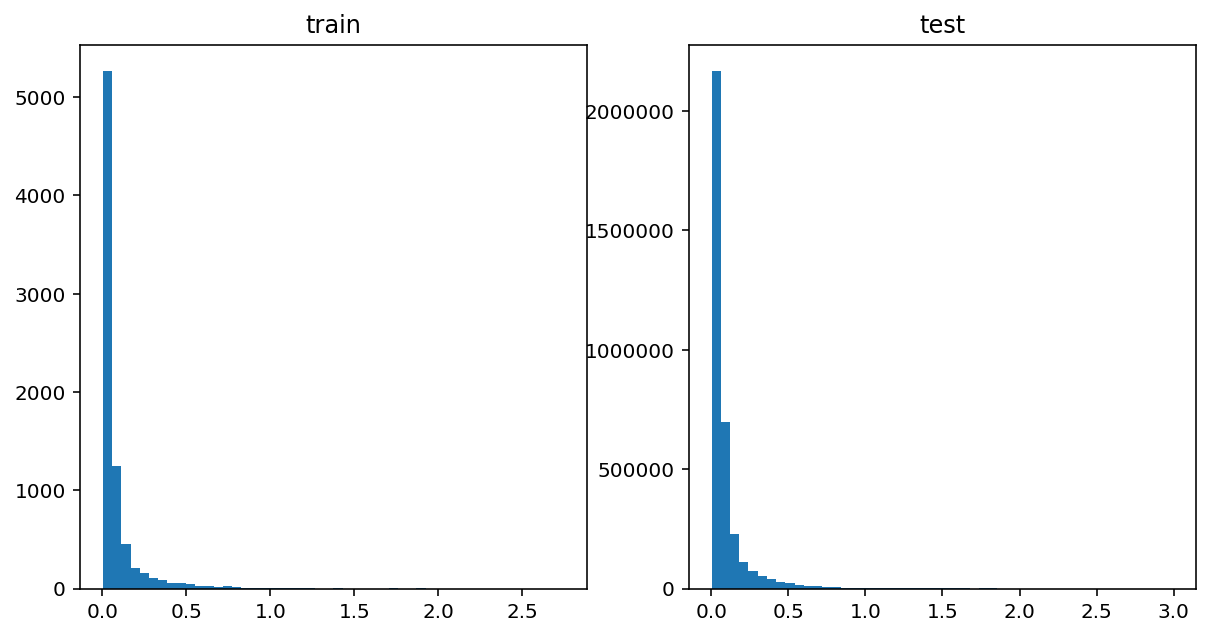

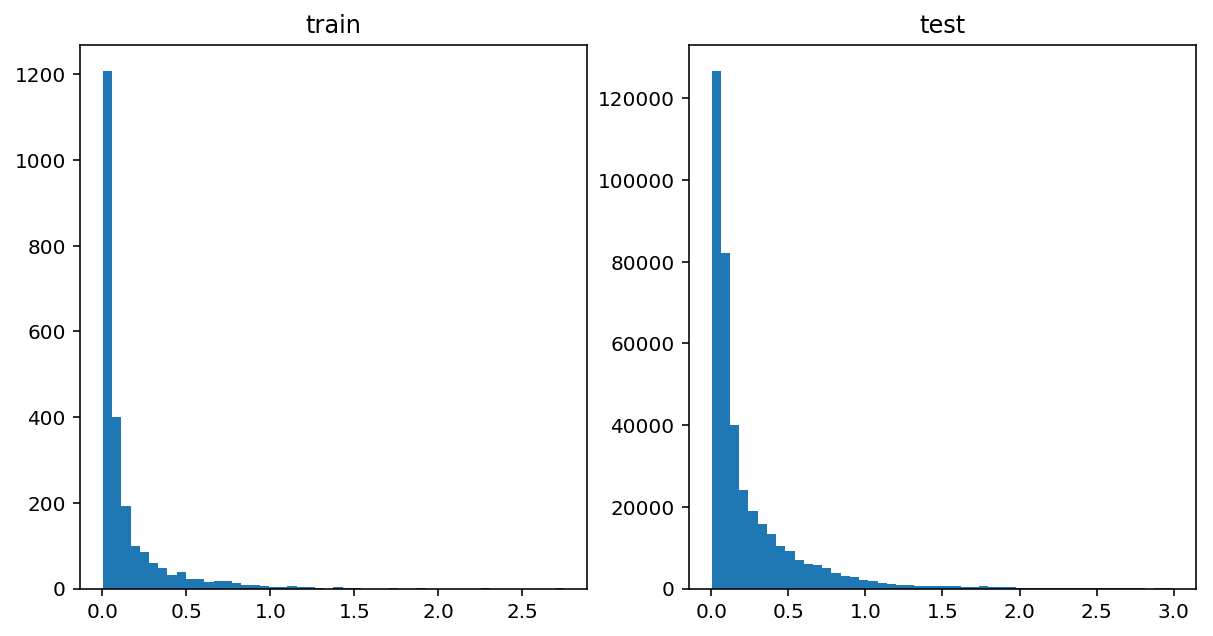

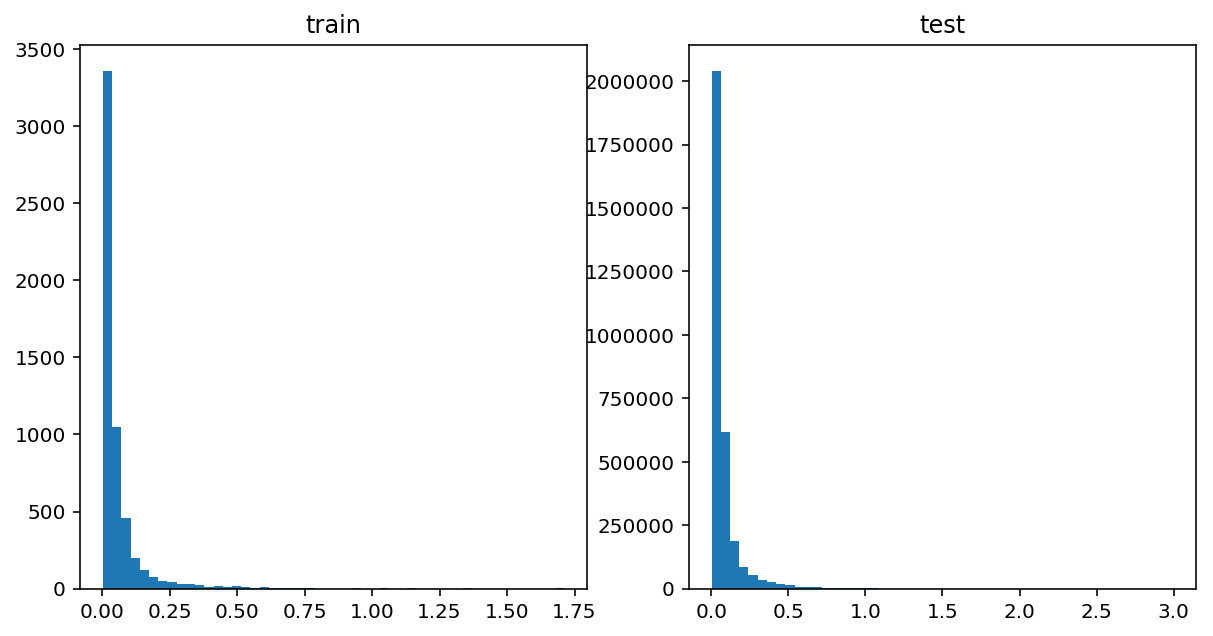

In [51]:
compare_cols(train_meta_df, test_meta_df, 'mwebv')
compare_cols(train_meta_df[train_meta_df.distmod.isnull()], test_meta_df[test_meta_df.distmod.isnull()], 'mwebv')
compare_cols(train_meta_df[train_meta_df.distmod.notnull()], test_meta_df[test_meta_df.distmod.notnull()], 'mwebv')

In [ ]:
test_meta_df[test_meta_df.hostgal_specz.notnull()].ddf.hist()

In [59]:
test_meta_df.shape

(3492890, 1286)

In [61]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
distance_modulus = cosmo.distmod(train_meta_df.hostgal_photoz)

/home/naoya.taguchi/anaconda3/lib/python3.6/site-packages/astropy/cosmology/core.py:1363: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


In [62]:
distance_modulus

<Quantity [       -inf, 45.40588235, 40.25619425, ...,        -inf,
                  -inf,        -inf] mag>

In [63]:
train_meta_df.distmod

0           NaN
1       45.4063
2       40.2561
3       40.7951
4       40.4166
5           NaN
6       39.7279
7       43.1524
8       41.1401
9           NaN
10      39.8317
11      42.4667
12      46.7959
13      42.6207
14          NaN
15          NaN
16      39.2171
17      38.8800
18      39.7258
19      44.4078
20      45.0753
21      46.7274
22      42.0691
23      36.9750
24          NaN
25      42.5158
26      38.9679
27      40.1939
28      42.7370
29      40.8445
         ...   
7818        NaN
7819    39.5014
7820    40.9681
7821        NaN
7822    37.4496
7823        NaN
7824    37.7087
7825    40.9044
7826        NaN
7827    39.6994
7828        NaN
7829    37.8452
7830        NaN
7831    39.1698
7832    39.9839
7833    39.4875
7834        NaN
7835    40.8250
7836    41.5364
7837    38.0319
7838        NaN
7839    46.6624
7840    37.0254
7841        NaN
7842        NaN
7843        NaN
7844    46.6108
7845        NaN
7846        NaN
7847        NaN
Name: distmod, Length: 7